In [2]:
import scripts.init_gpu as init_gpu
import scripts.init_dataset as init_dataset
import pandas as pd
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
init_gpu.initialize_gpus()

locations = ['LOC2', 'LOC3']

print("Loading Dataset...")
# load the dataset
df = pd.read_csv(
    f"../dataset/processed/{locations[0]}-{locations[1]}-scaled-balanced.csv")

length = len(df.columns) - 2  # subtract the two label columns

# get train-test set
train_df, test_df, train_web_sam1ples, test_web_samples = init_dataset.get_sample(
    df, locations, range(1500), 1200)

train_df.head()

Num GPUs Available:  1
Loading Dataset...
Training Websites: [1309, 228, 51, 563, 501, 457, 285, 209, 1385, 1116, 178, 1209, 864, 65, 61, 191, 447, 476, 1034, 1232, 54, 1149, 407, 1466, 1330, 1436, 1490, 859, 451, 919, 1206, 569, 13, 326, 1429, 865, 696, 1468, 318, 440, 689, 1492, 189, 778, 198, 735, 704, 1236, 541, 88, 940, 1098, 255, 775, 161, 1130, 600, 1287, 1266, 740, 1182, 393, 142, 93, 1354, 466, 592, 163, 1482, 206, 1456, 1462, 928, 1301, 747, 333, 758, 727, 429, 1372, 546, 1399, 1327, 146, 1247, 1300, 350, 1093, 1495, 334, 946, 777, 552, 1310, 1140, 449, 1402, 664, 114, 469, 1486, 646, 821, 548, 135, 432, 1161, 644, 435, 1342, 1022, 810, 1316, 939, 292, 542, 1493, 505, 1478, 1103, 538, 1197, 877, 1195, 817, 741, 1404, 283, 1043, 1010, 186, 96, 224, 313, 1285, 327, 1487, 1221, 130, 788, 781, 1220, 958, 1083, 514, 1133, 23, 234, 1099, 1419, 1312, 1463, 1498, 601, 890, 323, 929, 6, 539, 1025, 365, 1039, 217, 1280, 611, 1308, 1338, 1415, 1477, 1366, 765, 330, 1104, 1086, 1, 1226, 

/home/asil0892/doh_traffic_analysis/code/scripts/init_dataset.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.sort_values(by=["Location"], inplace=True)


,Location,Website,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,LOC2,0,-0.714089,0.541197,0.391921,-0.400778,-0.266345,-0.522526,0.023889,-0.261817,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
1,LOC2,1006,0.093792,-1.273349,-2.142801,1.205098,1.879002,2.139593,1.482513,2.382939,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
2,LOC2,1006,1.401091,-1.636258,0.527106,0.354928,-0.017609,-0.049260,-0.177300,-0.412692,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
3,LOC2,1006,-0.831599,0.662167,0.527106,0.354928,-0.017609,-0.049260,-0.177300,-0.412692,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216
4,LOC2,1006,0.093792,-1.152379,-2.007616,0.827245,1.630266,1.666328,1.281324,2.311938,...,0.125986,0.10277,0.092495,0.043004,0.158904,0.119506,0.099445,0.083843,0.037226,0.152216


In [3]:
from scripts.train_vae import VAE, Sampling, ConvVAE_BatchNorm
import tensorflow as tf
# web_model = tf.keras.models.load_model(f"../models/website/{locations[0]}-{locations[1]}-baseGRU-epochs300-train_samples1200-triplet_samples5.keras")

# location = 'LOC1'
vae_model = tf.keras.models.load_model(f"../models-{locations[0]}-{locations[1]}/vae/ci_vae/ConvBased/domain_and_class/{locations[0]}-{locations[1]}-e800-mse1-kl1.0-cl1.0-ConvBatchNorm-ldim96-hdim128.keras", custom_objects={'ConvVAE_BatchNorm': ConvVAE_BatchNorm, 'Sampling': Sampling})

def get_latent_z(x):
    content_tensor = tf.convert_to_tensor(x, dtype=tf.float32)
    z_mean, z_log_var, z = vae_model.encode(content_tensor)
    
    return z

/home/asil0892/doh_traffic_analysis/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
I0000 00:00:1733291557.363866  515107 gpu_process_state.cc:201] Using CUDA malloc Async allocator for GPU: 0
I0000 00:00:1733291557.363960  515107 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21242 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:71:00.0, compute capability: 8.9


In [4]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
def preprocess_data(train_df: pd.DataFrame, test_df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame, LabelEncoder]:
    le = LabelEncoder()


    X_train = train_df.iloc[:, 2:].to_numpy().astype(np.float32)
    X_test = test_df.iloc[:, 2:].to_numpy().astype(np.float32)

    y_train = le.fit_transform(train_df['Location'])
    y_test = le.transform(test_df['Location'])

    return (X_train, X_test, y_train, y_test, le)

X_train, X_test, y_train, y_test, le = preprocess_data(train_df, test_df)

Trace Location Classification

In [22]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from scripts.classification import evaluate_classification_model
from sklearn.svm import LinearSVC

model = XGBClassifier()
accuracy, precision, recall,f1_score,  confusion_matrix = evaluate_classification_model(X_train, y_train, X_test, y_test, model)
print(f"Accuracy: {accuracy * 100.0:.2f}, Precision: {precision * 100.0:.2f}, Recall: {recall * 100.0:.2f}, F1: {f1_score * 100 :.2f}")

Accuracy: 98.90, F1 Score:  98.90, Precision:  98.90, Recall:  98.90
Accuracy: 98.90, Precision: 98.90, Recall: 98.90, F1: 98.90


# latent location classification

In [5]:
def get_z_embeddings(data, vae_model=vae_model):
    embeddings = []
    chunk_size = 200
    for i in range(0, len(data), chunk_size):
        chunk = data[i:i+chunk_size]
        _, _, transformed_chunk = vae_model.encode(chunk)
        embeddings.append(transformed_chunk)

    return np.vstack(embeddings)

In [6]:
X_train_latent = get_z_embeddings(X_train)
X_test_latent = get_z_embeddings(X_test)

I0000 00:00:1733291566.212829  515252 cuda_dnn.cc:529] Loaded cuDNN version 90300


Latent Location Classification

In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scripts.classification import evaluate_classification_model


model = XGBClassifier()
accuracy, precision, recall,f1_score,  confusion_matrix = evaluate_classification_model(X_train_latent, y_train, X_test_latent, y_test, model)
print(f"Accuracy: {accuracy * 100.0:.2f}, Precision: {precision * 100.0:.2f}, Recall: {recall * 100.0:.2f}, F1: {f1_score * 100 :.2f}")

Accuracy: 92.53, F1 Score:  92.53, Precision:  92.53, Recall:  92.53
Accuracy: 92.53, Precision: 92.53, Recall: 92.53, F1: 92.53


[0.00405046 0.00304441 0.01063453 0.00269815 0.00891247 0.00292919
 0.00247125 0.0025562  0.06661493 0.00582328 0.01358247 0.00313984
 0.007664   0.01386086 0.00671635 0.00411503 0.01389668 0.0181261
 0.00320654 0.00609518 0.02637232 0.00269016 0.00331527 0.09723118
 0.09790697 0.00458108 0.00381496 0.00218996 0.00588743 0.00997487
 0.0041265  0.00651746 0.00262523 0.00241399 0.00372101 0.00474037
 0.00243154 0.00159811 0.03065409 0.00293524 0.00269763 0.06304755
 0.00334119 0.00256522 0.01039221 0.00217019 0.00246243 0.0032072
 0.00237414 0.00529339 0.00992261 0.00590507 0.05557018 0.00779107
 0.00251709 0.00416622 0.03713388 0.00239316 0.02231717 0.00264888
 0.00245257 0.0028843  0.00282786 0.0021409  0.00231069 0.00385858
 0.00325019 0.00262873 0.00290775 0.00263095 0.00398819 0.00228586
 0.00231377 0.00327847 0.00459211 0.00793476 0.00561628 0.00262848
 0.00698132 0.00892262 0.00255941 0.00296923 0.0090694  0.00206496
 0.00306212 0.00247239 0.00427706 0.00324003 0.00492731 0.071782

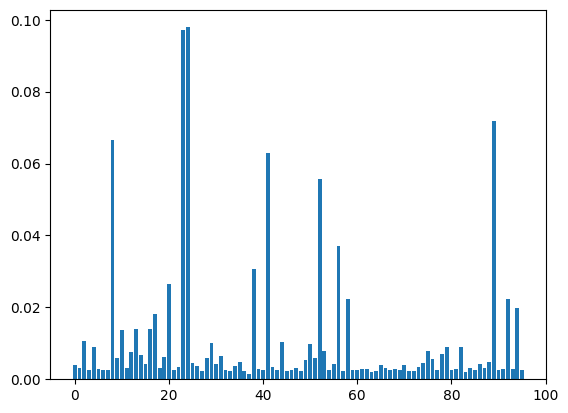

In [8]:
import matplotlib.pyplot as plt
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, RepeatVector
from scripts.classification import evaluate_classification_model
import matplotlib.pyplot as plt

# Define a simple feedforward neural network model for binary classification
def build_neural_network(input_dim):
    model = Sequential([
        # RepeatVector(1),
        # GRU(32, recurrent_dropout=0.1),
        
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Set input dimension
input_dim = X_train_latent.shape[1]

# Initialize the model
model = build_neural_network(input_dim)

# Train the model
model.fit(X_train_latent, y_train, epochs=10, batch_size=32, validation_split=0.1)
model.save("../models-LOC2-LOC3/classification/location/latent_ci_vae-e800-kl1.0.keras")

Epoch 1/10


/home/asil0892/doh_traffic_analysis/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733291648.015977  515250 service.cc:148] XLA service 0x7fc1444503a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733291648.015996  515250 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-12-04 16:54:08.041658: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-04 16:54:08.427928: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.2 which is older than the 

6683/6683 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7169 - loss: 0.5473 - val_accuracy: 0.8385 - val_loss: 0.3405
Epoch 2/10
6683/6683 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8594 - loss: 0.3293 - val_accuracy: 0.8902 - val_loss: 0.2495
Epoch 3/10
6683/6683 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8808 - loss: 0.2850 - val_accuracy: 0.8961 - val_loss: 0.2348
Epoch 4/10
6683/6683 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8892 - loss: 0.2693 - val_accuracy: 0.9017 - val_loss: 0.2297
Epoch 5/10
6683/6683 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8936 - loss: 0.2597 - val_accuracy: 0.9034 - val_loss: 0.2220
Epoch 6/10
6683/6683 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8988 - loss: 0.2486 - val_accuracy: 0.9058 - val_loss: 0.2195
Epoch 7/10
6683/6683 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9027 - loss: 0.2403 - val_accuracy: 0.8721 - val_loss: 0.2866
Epoch 8/10
6683/6683 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9037 - loss: 0.2377 - val

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_classification_neural_model(X_test, y_test, model):
    # Generate predictions on the test set
    y_pred_prob = model.predict(X_test)  # Predicted probabilities
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy * 100.0:.2f}, F1: {f1 * 100:.2f} Precision: {precision * 100.0:.2f}, Recall: {recall * 100.0:.2f}")
    return accuracy, precision, recall, f1, conf_matrix

accuracy, precision, recall, f1_score, confusion_matrix = evaluate_classification_neural_model(X_test_latent, y_test, model)
print(f"Accuracy: {accuracy * 100.0:.2f}, F1: {f1_score * 100:.2f} Precision: {precision * 100.0:.2f}, Recall: {recall * 100.0:.2f}")


1857/1857 ━━━━━━━━━━━━━━━━━━━━ 1s 306us/step
Accuracy: 92.04, F1: 91.92 Precision: 93.35, Recall: 90.53
Accuracy: 92.04, F1: 91.92 Precision: 93.35, Recall: 90.53


SVM Location Classification: To find a hyperplane

In [12]:
from sklearn import svm
from scripts.classification import evaluate_classification_model

model = svm.LinearSVC()
evaluate_classification_model(X_train_latent, y_train, X_test_latent, y_test, model)

Accuracy: 71.35, F1 Score:  71.35, Precision:  71.35, Recall:  71.35


(0.7134680134680135,
 0.7135033332884477,
 0.7134680134680135,
 0.7134561627433402,
 array([[21381,  8319],
        [ 8701, 20999]]))

In [11]:
weights = model.coef_
bias = model.intercept_

weights, bias

(array([[-0.00397081, -0.01352405, -0.09995704, -0.04965017,  0.0385788 ,
         -0.03083002,  0.03959346,  0.00956229,  0.00140596, -0.03013246,
         -0.01612792, -0.06630699, -0.07444691,  0.01047472, -0.00322296,
         -0.04055877, -0.00997551, -0.01367152, -0.01247419,  0.01672801,
          0.04173102,  0.01142011,  0.01137553, -0.02385601, -0.09071965,
          0.05246061,  0.02174831,  0.01471895,  0.01721549,  0.02575407,
          0.06012632,  0.0020044 ,  0.02336756, -0.04329318,  0.04956333,
         -0.05855261, -0.02199754,  0.02927844, -0.01261431, -0.01241895,
         -0.0230875 , -0.06681904,  0.05003476,  0.02010518,  0.00346181,
          0.02301707, -0.0304388 ,  0.02017233, -0.02029821,  0.00345141,
          0.06968749, -0.00651222,  0.01388922, -0.07017124, -0.02261628,
         -0.02848751, -0.00235629,  0.08148276,  0.01940355, -0.05463024,
         -0.04234615,  0.02737515,  0.00801456,  0.00943895,  0.03832499,
         -0.01716799,  0.01079273, -0.

# Location Classification within Triplet Embeddings 

In [4]:
import numpy as np

web_model = tf.keras.models.load_model(f"../models/website/LOC1-LOC2-baseGRU-epochs200-train_samples1200-triplet_samples5.keras")

def get_web_embeddings(data, web_model):
    embeddings = []
    chunk_size = 2000
    for i in range(0, len(data), chunk_size):
        chunk = data[i: i + chunk_size]
        
        # Pad the chunk if it's smaller than chunk_size
        if len(chunk) < chunk_size:
            chunk = chunk.reindex(range(chunk_size), fill_value=0)
        
        transformed_chunk = web_model(chunk)
        embeddings.append(transformed_chunk)
    
    return np.vstack(embeddings)

X_train_triplet = get_web_embeddings(X_train, web_model)
X_test_triplet = get_web_embeddings(X_test, web_model)

I0000 00:00:1731544262.527723 3382693 cuda_dnn.cc:529] Loaded cuDNN version 90300


In [5]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scripts.classification import evaluate_classification_model


model = XGBClassifier()
accuracy, precision, recall,f1_score,  confusion_matrix = evaluate_classification_model(X_train_triplet, y_train, X_test_triplet, y_test, model)
print(f"Accuracy: {accuracy * 100.0:.2f}, Precision: {precision * 100.0:.2f}, Recall: {recall * 100.0:.2f}, F1: {f1_score * 100 :.2f}")

Accuracy: 89.21, F1 Score:  89.18, Precision:  89.72, Recall:  89.21
Accuracy: 89.21, Precision: 89.72, Recall: 89.21, F1: 89.18


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, RepeatVector
from scripts.classification import evaluate_classification_model
import matplotlib.pyplot as plt

# Define a simple feedforward neural network model for binary classification
def build_neural_network(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Set input dimension
input_dim = X_train_triplet.shape[1]

# Initialize the model
model = build_neural_network(input_dim)

# Train the model
model.fit(X_train_triplet, y_train, epochs=10, batch_size=32, validation_split=0.1)
# model.save("../models/classification/location/triplet_classifier.keras")

Epoch 1/10


/home/asil0892/doh_traffic_analysis/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1731333460.909584 3072061 service.cc:148] XLA service 0x7f578459dd50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731333460.909701 3072061 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
I0000 00:00:1731333460.909705 3072061 service.cc:156]   StreamExecutor device (1): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-11-12 00:57:40.941938: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-12 00:57:41.33

13500/13500 ━━━━━━━━━━━━━━━━━━━━ 6s 336us/step - accuracy: 0.5724 - loss: 0.6722 - val_accuracy: 0.4232 - val_loss: 0.9543
Epoch 2/10
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 4s 313us/step - accuracy: 0.6619 - loss: 0.6009 - val_accuracy: 0.4526 - val_loss: 1.0049
Epoch 3/10
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 4s 324us/step - accuracy: 0.6943 - loss: 0.5670 - val_accuracy: 0.4728 - val_loss: 1.0447
Epoch 4/10
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 6s 453us/step - accuracy: 0.7105 - loss: 0.5482 - val_accuracy: 0.5065 - val_loss: 1.0412
Epoch 5/10
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 6s 421us/step - accuracy: 0.7204 - loss: 0.5343 - val_accuracy: 0.5240 - val_loss: 1.0106
Epoch 6/10
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 5s 362us/step - accuracy: 0.7268 - loss: 0.5263 - val_accuracy: 0.5091 - val_loss: 1.0482
Epoch 7/10
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 4s 320us/step - accuracy: 0.7332 - loss: 0.5190 - val_accuracy: 0.5496 - val_loss: 0.9851
Epoch 8/10
13500/13500 ━━━━━━━━━━━━━━━━━━━━ 5s 404us/step - accuracy: 0.7

In [12]:
# model = tf.keras.models.load_model("../models/classification/location/triplet_classifier.keras")
accuracy, precision, recall, f1_score, confusion_matrix = evaluate_classification_neural_model(X_test_triplet, y_test, model)
print(f"Accuracy: {accuracy * 100.0:.2f}, F1: {f1_score * 100:.2f} Precision: {precision * 100.0:.2f}, Recall: {recall * 100.0:.2f}")

3750/3750 ━━━━━━━━━━━━━━━━━━━━ 1s 290us/step
Accuracy: 66.38, F1: 67.04 Precision: 65.74, Recall: 68.40
